In [41]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Preparation

In [42]:
# Loading In Dataset
data = pd.read_csv('diabetes.csv')

data.sample(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
14332,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0
68880,1.0,0.0,0.0,1.0,25.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,4.0,3.0,5.0,0.0,0.0,10.0,4.0,4.0
60424,1.0,1.0,1.0,1.0,37.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
19011,0.0,0.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,2.0,0.0,0.0,1.0,3.0,5.0,8.0
67813,1.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [43]:
data.sample().T

,7768
Diabetes_binary,0.0
HighBP,0.0
HighChol,0.0
CholCheck,1.0
BMI,32.0
Smoker,1.0
Stroke,0.0
HeartDiseaseorAttack,0.0
PhysActivity,1.0
Fruits,1.0


In [44]:
# getting dimension of data

data.shape

(70692, 22)

In [45]:
data.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [46]:
# changing the data type to category for categorical variables

for col in data.columns:
    unique_val = data[col].nunique()

    if unique_val < 80:
        data[col] = data[col].map(lambda x: int(x)).astype('category')

    

In [47]:
data.dtypes

Diabetes_binary         category
HighBP                  category
HighChol                category
CholCheck               category
BMI                      float64
Smoker                  category
Stroke                  category
HeartDiseaseorAttack    category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                 category
MentHlth                category
PhysHlth                category
DiffWalk                category
Sex                     category
Age                     category
Education               category
Income                  category
dtype: object

In [48]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [49]:
# checking for duplicates
data.duplicated().sum()

1635

In [50]:
# removing duplicates

data.drop_duplicates(inplace=True)

In [51]:
data.shape

(69057, 22)

In [52]:
#getting number of unique items in columns in data
data.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

# Exploratory Data Analysis

In [53]:
data['Diabetes_binary'].value_counts(normalize=True).round(2)

1    0.51
0    0.49
Name: Diabetes_binary, dtype: float64

In [54]:
data['Class'] = data['Diabetes_binary'].map({0:'Negative', 1:'Positive'})
data['Class'].value_counts(normalize=True).round(2)

Positive    0.51
Negative    0.49
Name: Class, dtype: float64

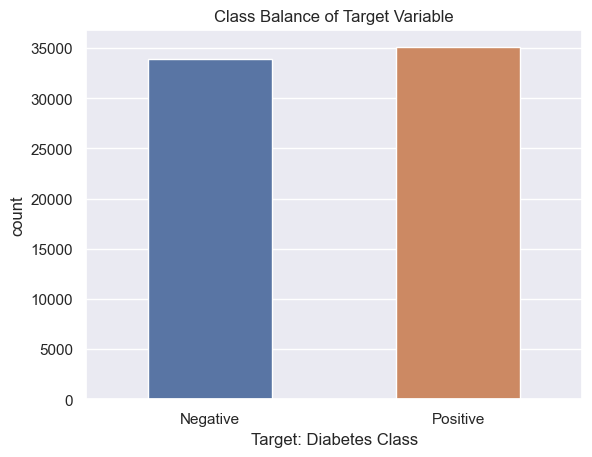

In [55]:

sns.countplot(data=data, x = 'Class',width=0.5)
plt.xlabel('Target: Diabetes Class')
plt.title("Class Balance of Target Variable");

Observation

* The target variable is almost balanced with **51%** in the positive class and **49%** in the negative class.

HighBP,0,1
Class,,
Negative,0.30,0.19
Positive,0.13,0.38


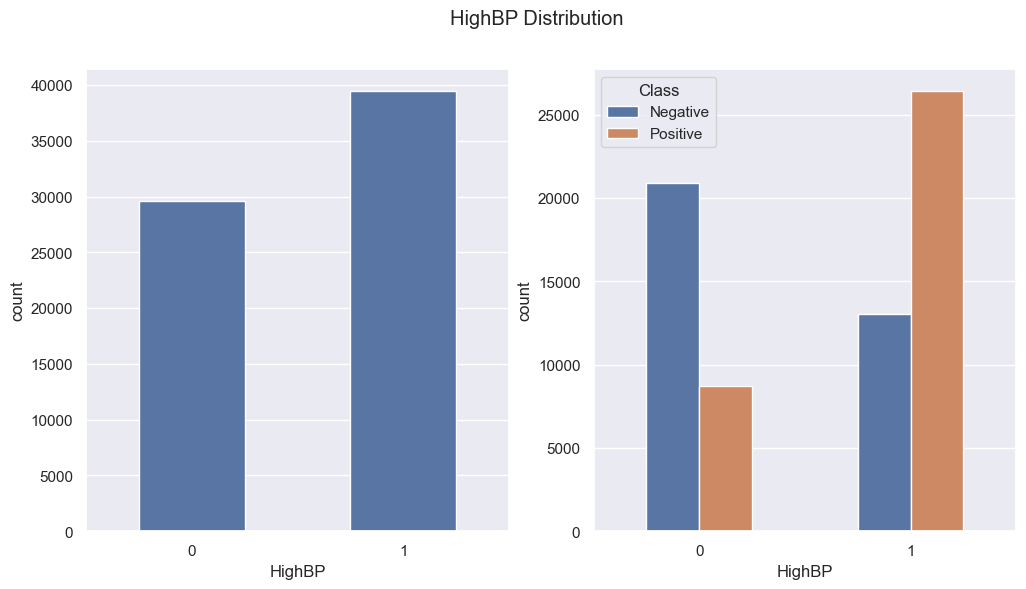

HighChol,0,1
Class,,
Negative,0.30,0.19
Positive,0.17,0.34


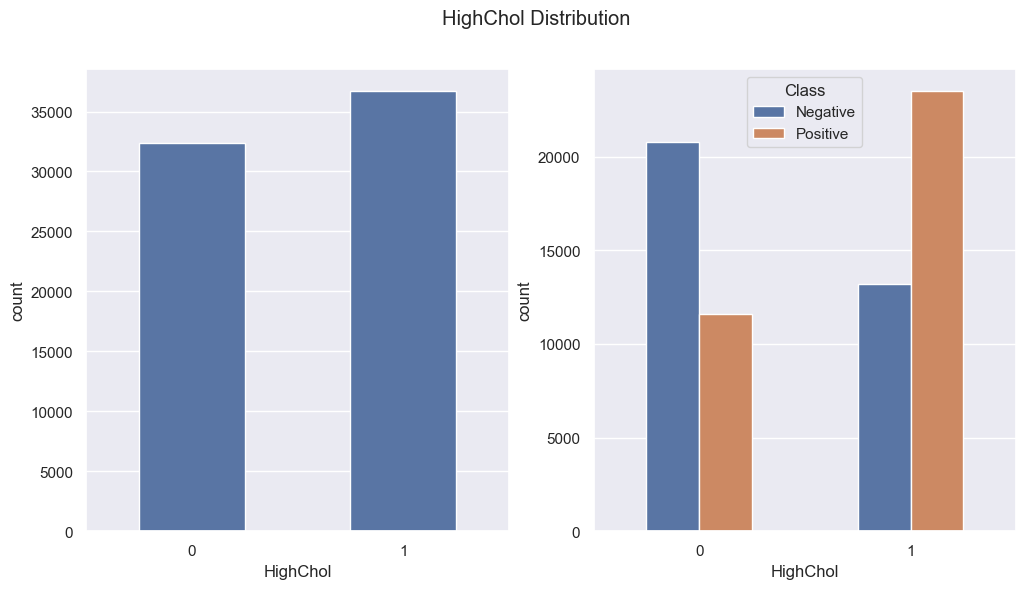

CholCheck,0,1
Class,,
Negative,0.02,0.47
Positive,0.00,0.50


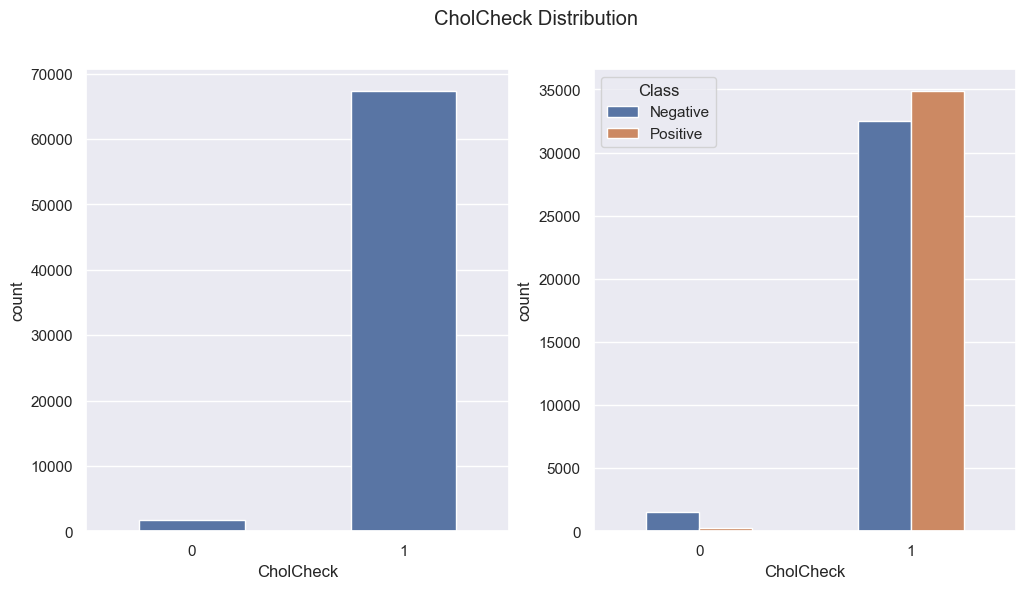

Smoker,0,1
Class,,
Negative,0.27,0.22
Positive,0.24,0.26


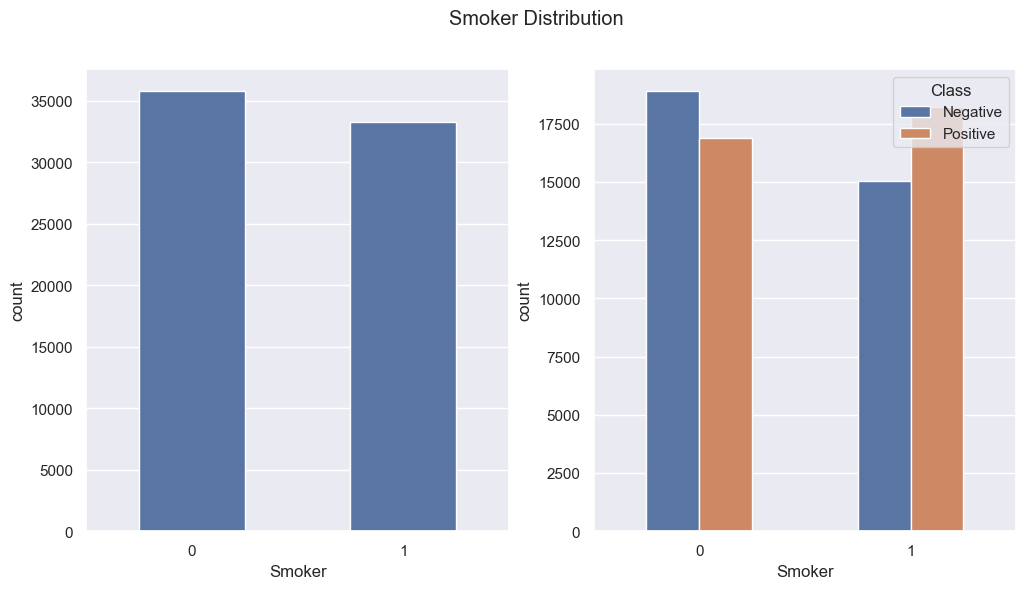

Stroke,0,1
Class,,
Negative,0.48,0.02
Positive,0.46,0.05


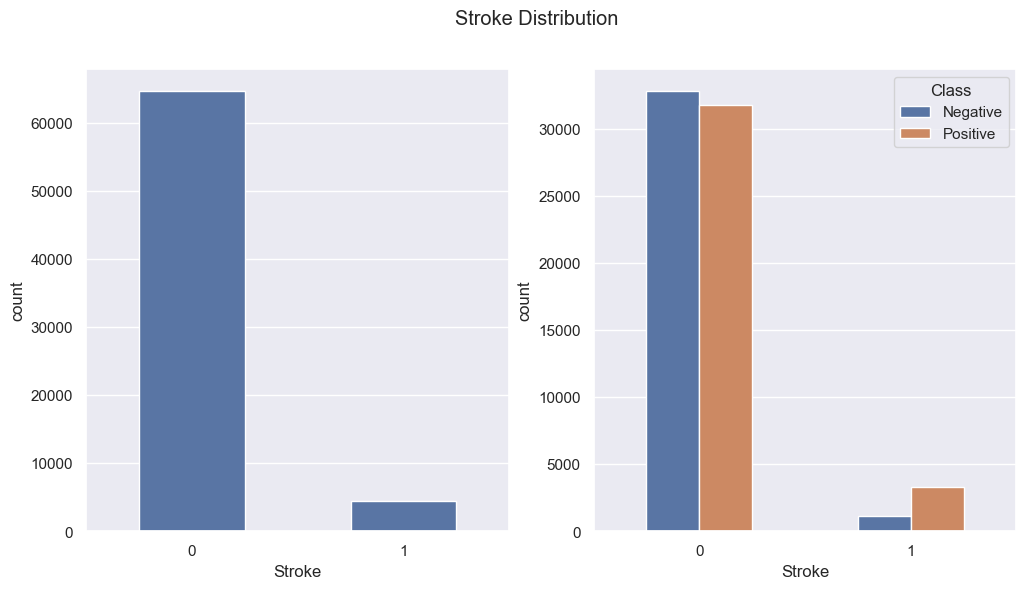

HeartDiseaseorAttack,0,1
Class,,
Negative,0.45,0.04
Positive,0.39,0.11


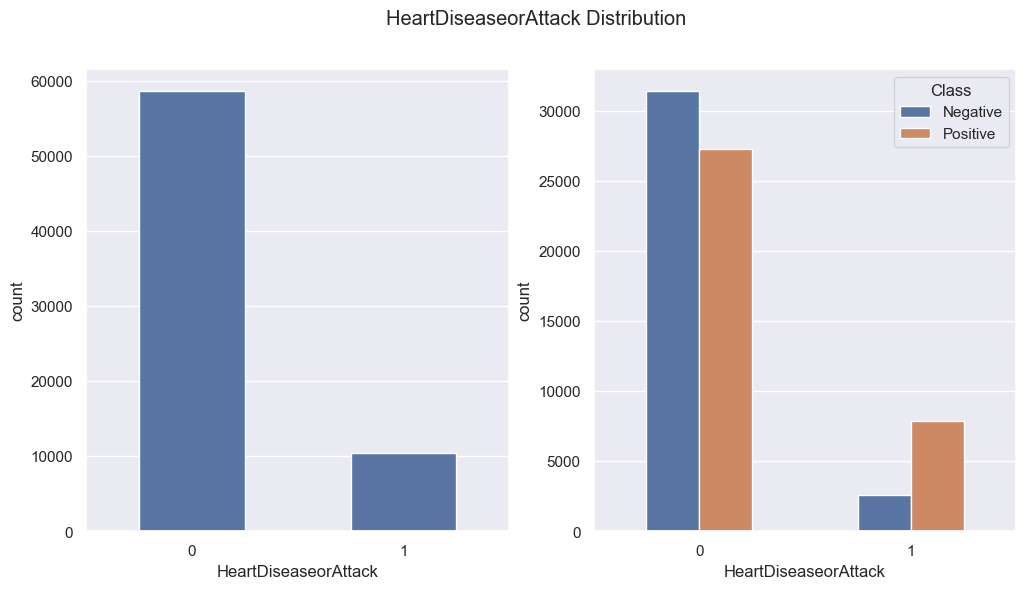

PhysActivity,0,1
Class,,
Negative,0.11,0.38
Positive,0.19,0.32


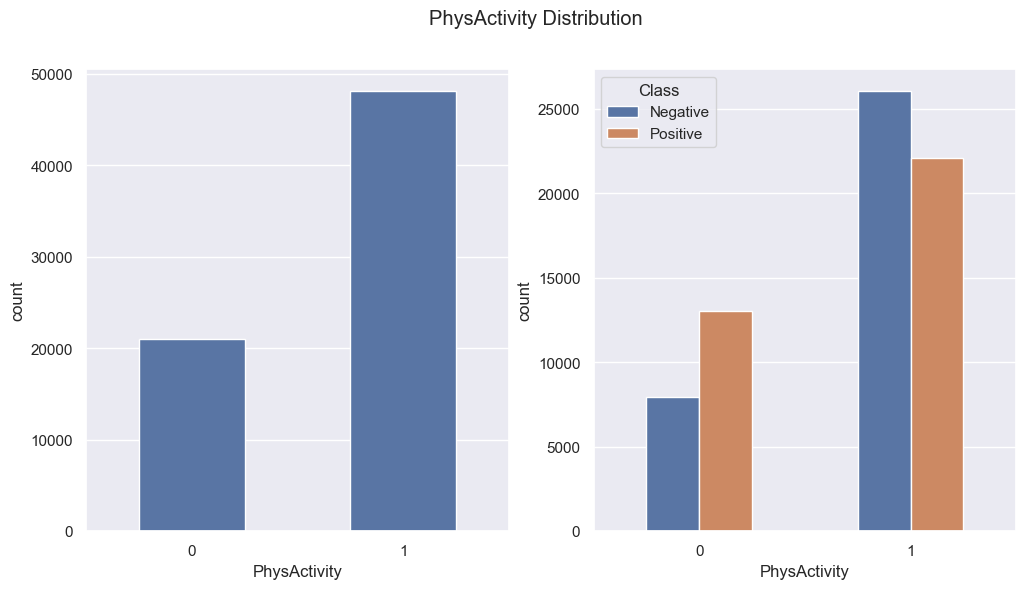

Fruits,0,1
Class,,
Negative,0.18,0.31
Positive,0.21,0.30


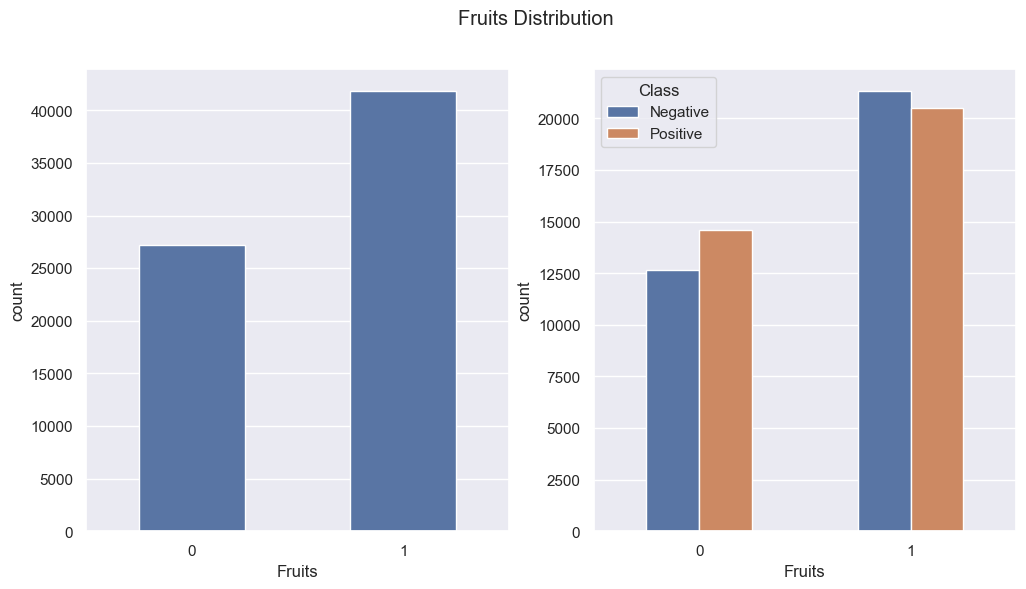

Veggies,0,1
Class,,
Negative,0.09,0.40
Positive,0.12,0.38


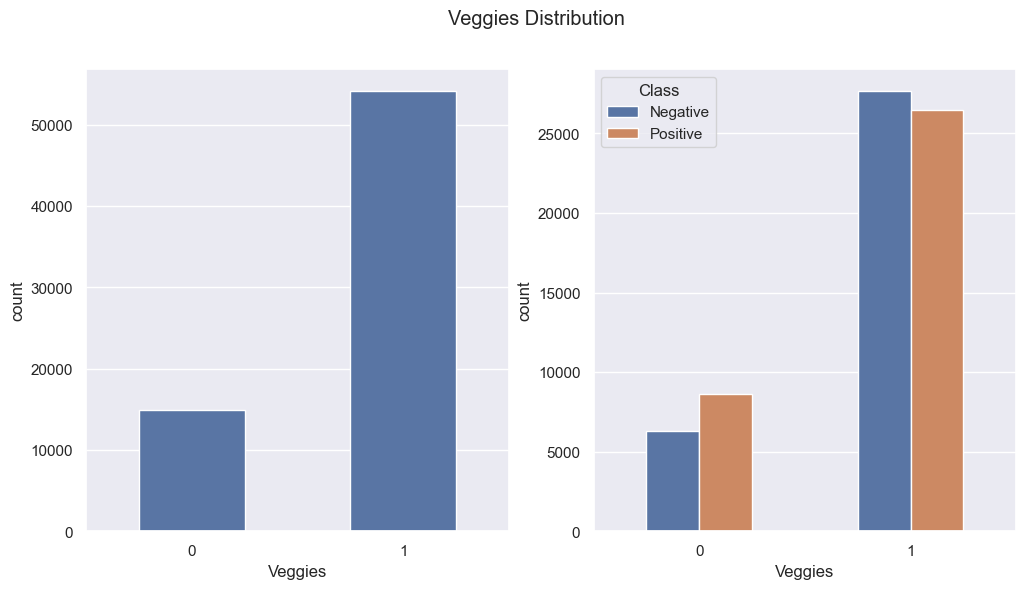

HvyAlcoholConsump,0,1
Class,,
Negative,0.46,0.03
Positive,0.50,0.01


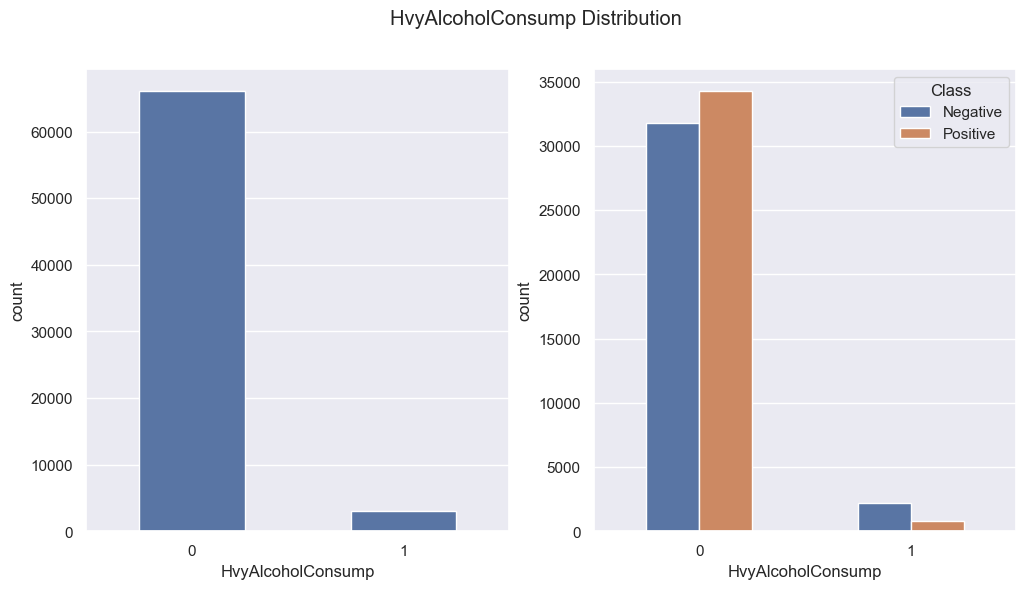

AnyHealthcare,0,1
Class,,
Negative,0.03,0.47
Positive,0.02,0.49


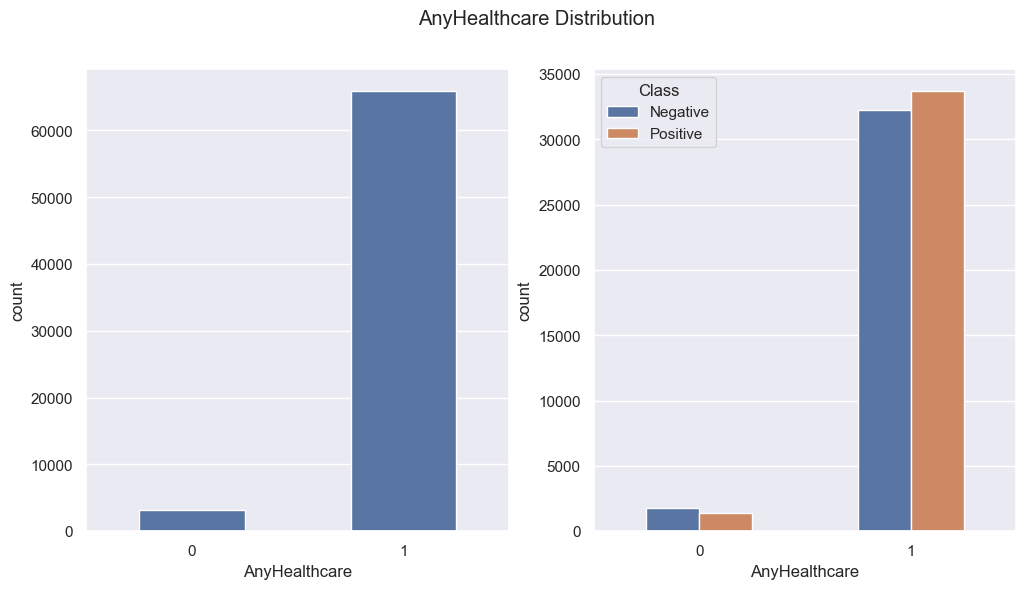

NoDocbcCost,0,1
Class,,
Negative,0.45,0.04
Positive,0.45,0.05


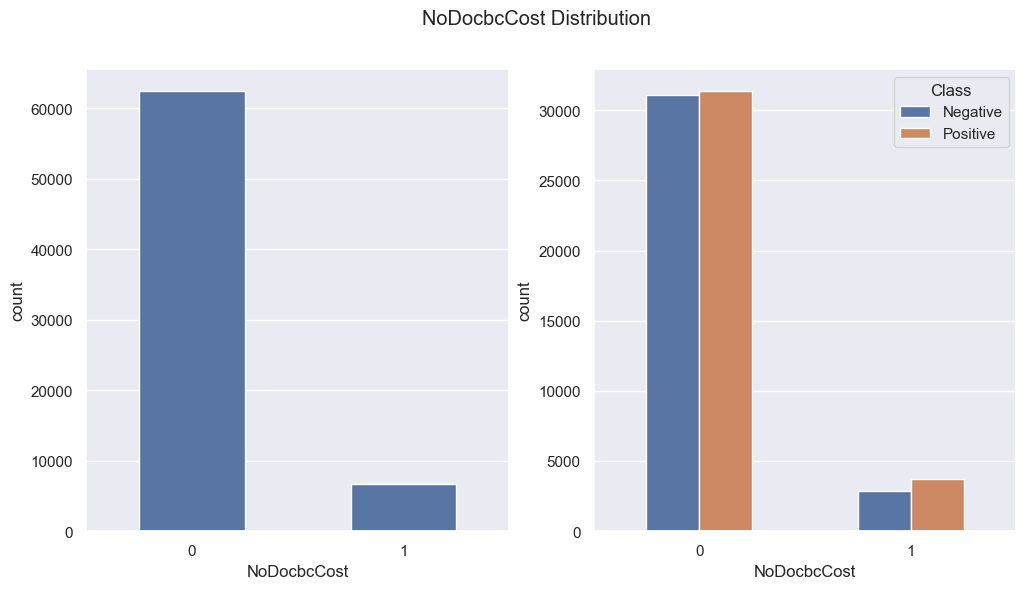

GenHlth,1,2,3,4,5
Class,,,,,
Negative,0.09,0.19,0.14,0.05,0.02
Positive,0.02,0.09,0.19,0.14,0.07


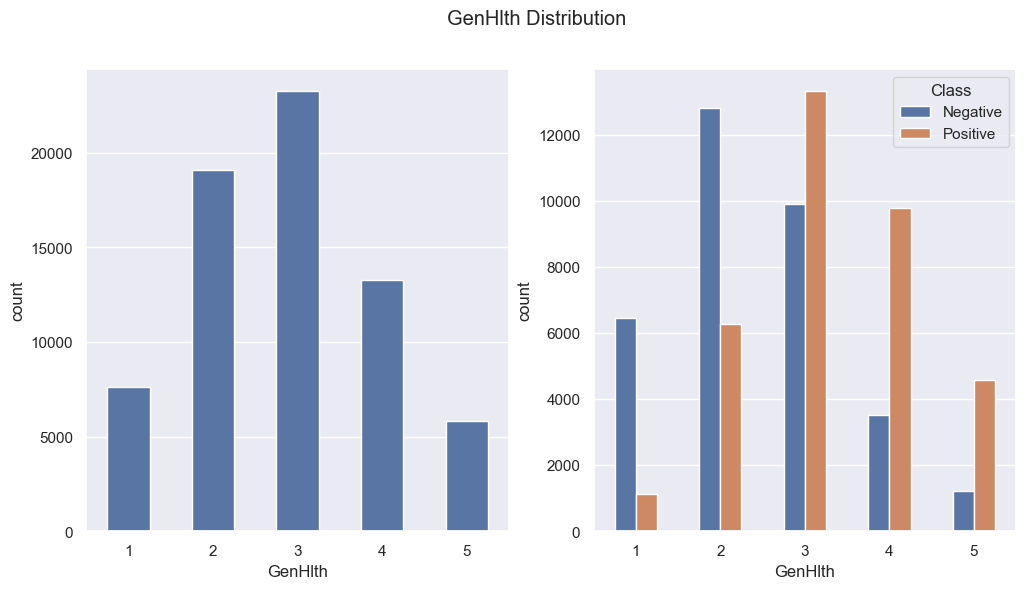

DiffWalk,0,1
Class,,
Negative,0.42,0.07
Positive,0.32,0.19


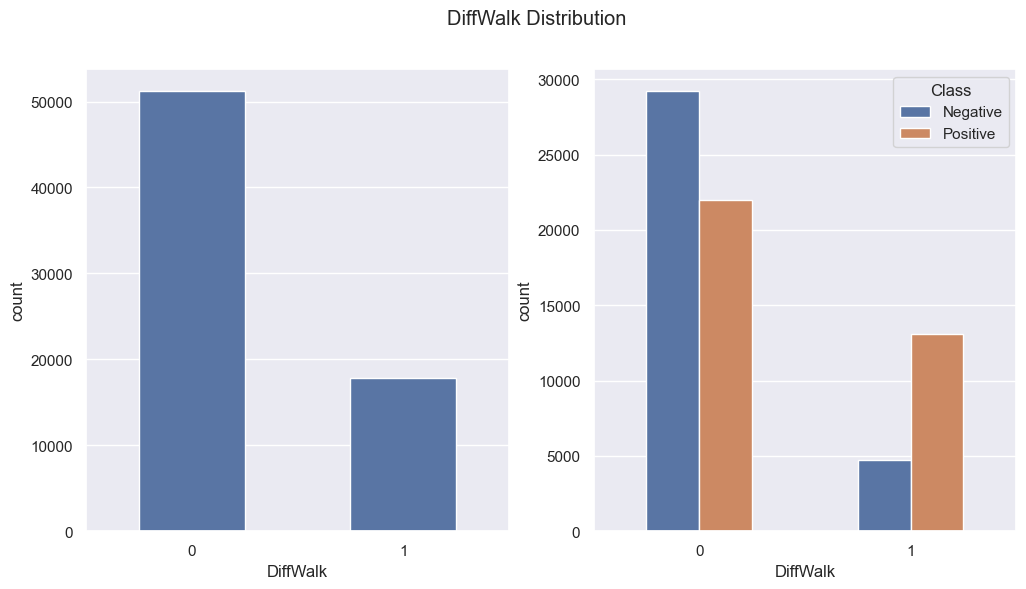

Sex,0,1
Class,,
Negative,0.28,0.21
Positive,0.27,0.24


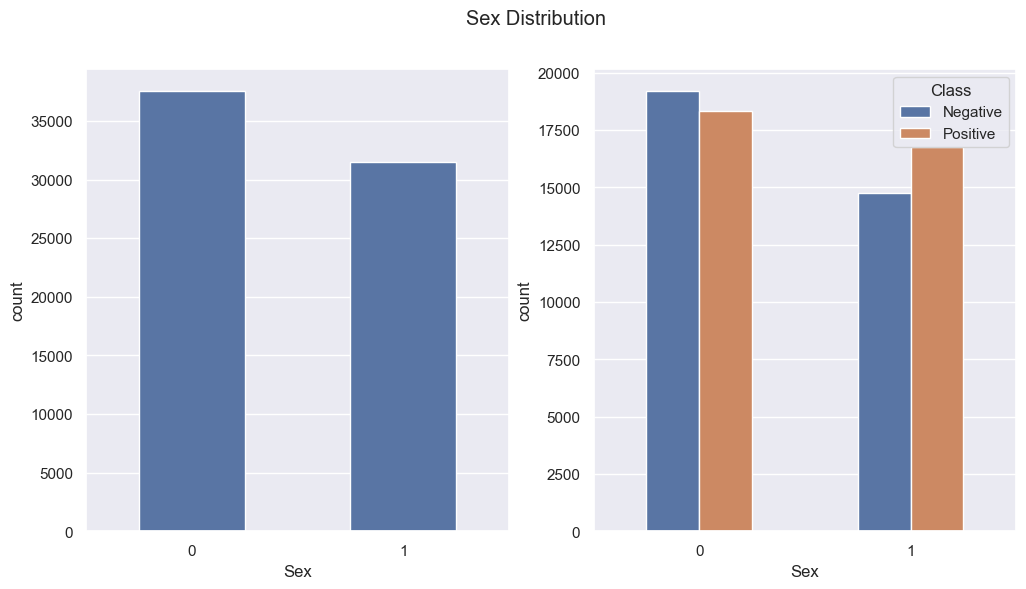

Age,1,2,3,4,5,6,7,8,9,10,11,12,13
Class,,,,,,,,,,,,,
Negative,0.01,0.02,0.02,0.03,0.03,0.04,0.05,0.06,0.06,0.06,0.04,0.03,0.03
Positive,0.00,0.00,0.00,0.01,0.02,0.03,0.04,0.06,0.08,0.09,0.07,0.05,0.05


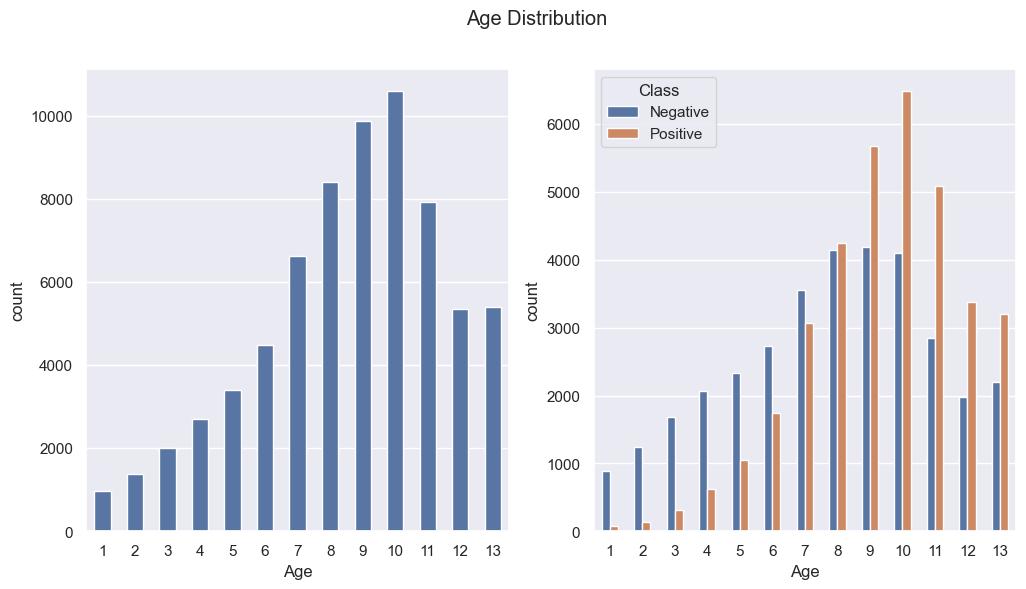

Education,1,2,3,4,5,6
Class,,,,,,
Negative,0.0,0.01,0.02,0.12,0.14,0.21
Positive,0.0,0.02,0.03,0.16,0.15,0.15


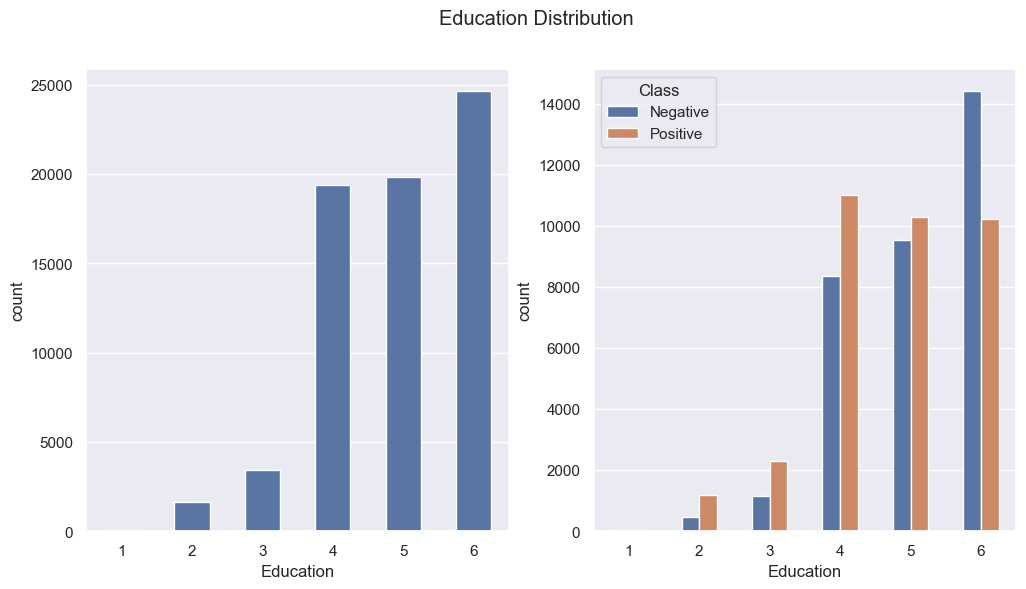

Income,1,2,3,4,5,6,7,8
Class,,,,,,,,
Negative,0.02,0.02,0.03,0.04,0.05,0.07,0.09,0.18
Positive,0.03,0.04,0.05,0.06,0.07,0.08,0.08,0.10


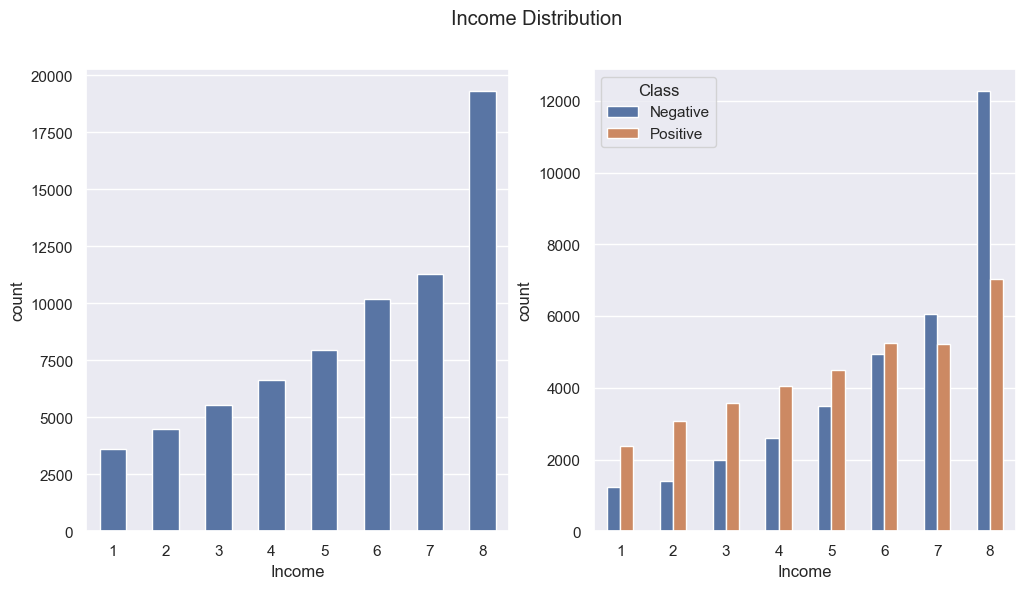

Class,Negative,Positive
Class,,
Negative,0.49,0.00
Positive,0.00,0.51


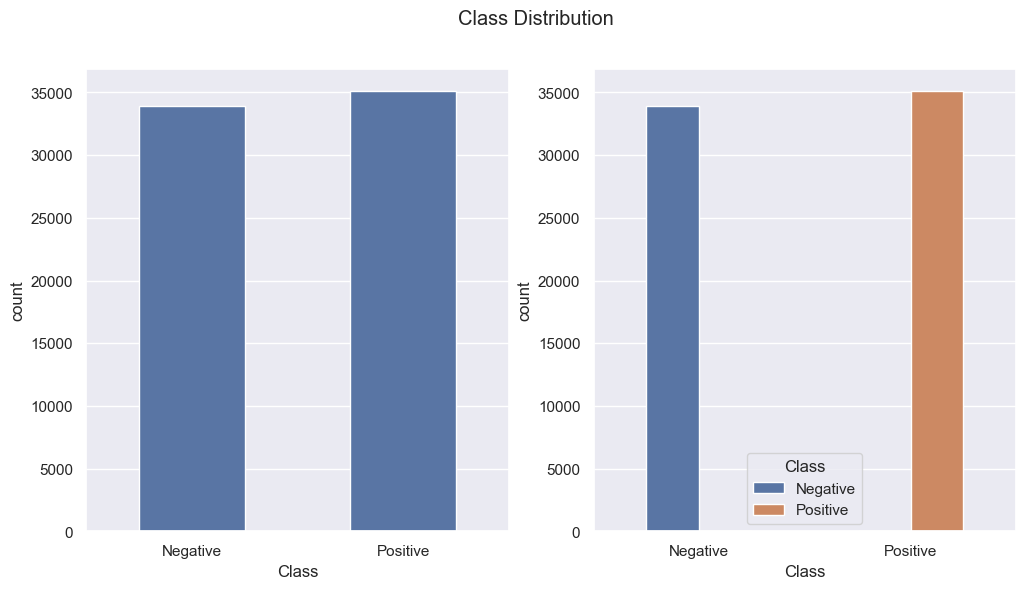

In [16]:
# Generating Count plots for all features 

palette= sns.color_palette(n_colors=1)
for cols in data.columns[1:]:
    if data[cols].nunique() < 20 :
        cross_df=pd.crosstab(data['Class'],data[cols],normalize=True).round(2)
        
        display(cross_df)
        
        figure,axes = plt.subplots(1,2,figsize=[12,6])
        sns.countplot(data,x=cols, width = 0.5,ax=axes[0], palette=palette)
        
        sns.countplot(data,x=cols,hue='Class', width = 0.5,ax=axes[1])
        

        plt.suptitle(f"{cols} Distribution")
        plt.show()
        
        
        print('\n')

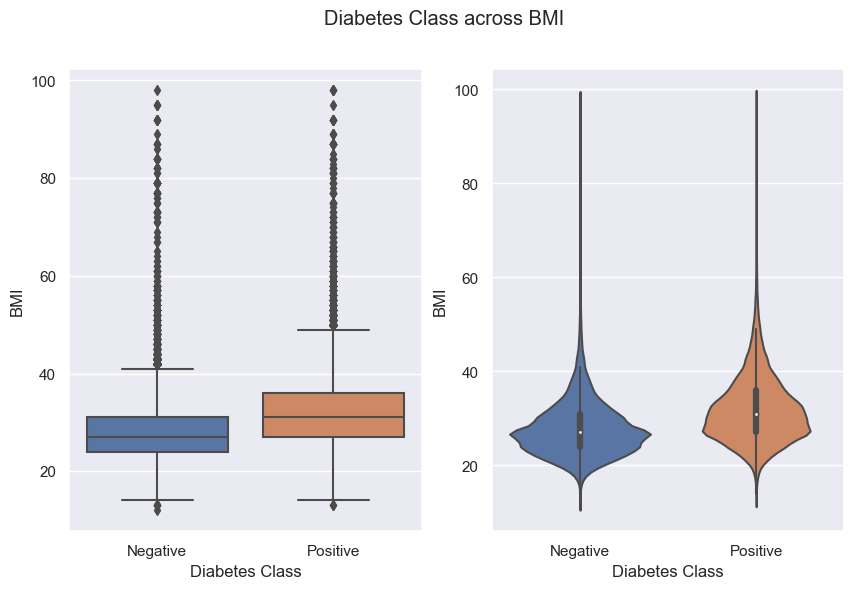

In [17]:
# Exploring Relationship between BMI and Diabetes class

figure,axes=plt.subplots(1,2,figsize=(10,6))
plt.suptitle('Diabetes Class across BMI')

sns.boxplot(data=data, x = 'Class',y='BMI', ax = axes[0])
axes[0].set_xlabel('Diabetes Class',axes=axes[0])

sns.violinplot(data=data, x = 'Class',y='BMI', ax=axes[1])
plt.xlabel('Diabetes Class');

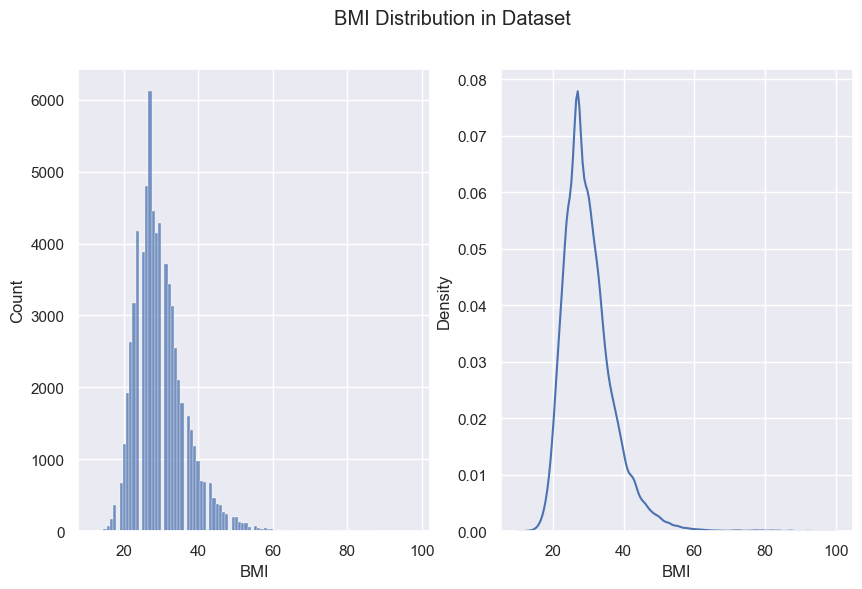

In [18]:

figure,axes=plt.subplots(1,2,figsize=(10,6))
plt.suptitle('BMI Distribution in Dataset')
sns.histplot(data=data, x='BMI',ax=axes[0],bins=100)

sns.kdeplot(data=data, x='BMI',ax = axes[1]);

* Observation  
    * The histogram and density plot of the BMI feature shows the presence of a long tail in the feature
    * High density of people with BMI 20 - 40

* Action: Taking a log of the data of the feature will normalize this feature.

In [19]:
data['BMI'] = np.log1p(data['BMI'])

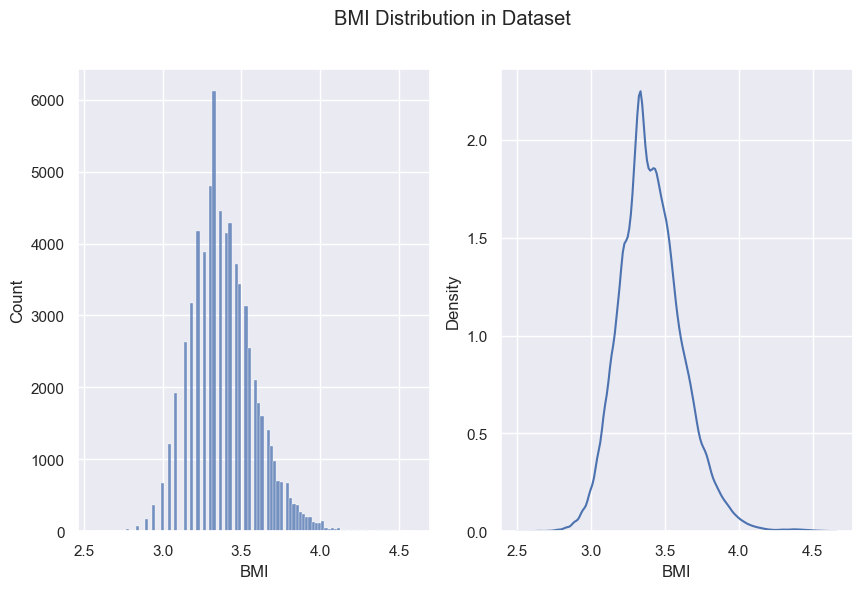

In [20]:
figure,axes=plt.subplots(1,2,figsize=(10,6))
plt.suptitle('BMI Distribution in Dataset')
sns.histplot(data=data, x='BMI',ax=axes[0],bins=100)

sns.kdeplot(data=data, x='BMI',ax = axes[1]);

Much better!

In [21]:
data.drop(columns=['Class'],inplace=True)

## Exploring Relationships

In [22]:
from scipy.stats import chi2_contingency
chi2_list = []
for col_x in data.columns:
    for col_y in data.columns:
        if col_x != col_y:

            CrosstabResult=pd.crosstab(index=data[col_x],columns=data[col_y])
            # Performing Chi-sq test
            ChiSqResult = chi2_contingency(CrosstabResult)

            chi2_list.append((col_x,col_y,round(ChiSqResult[1],2)))

In [23]:
cor_df = pd.DataFrame(chi2_list, columns = ['Column1', 'Column2', 'Correlation'])

high_cor_df = cor_df.query('Correlation >0.05').sort_values(by='Correlation', 
            ascending=False).drop_duplicates(subset='Correlation').reset_index(drop=True)

high_cor_df

,Column1,Column2,Correlation
0,CholCheck,Income,0.94
1,CholCheck,Veggies,0.81
2,CholCheck,Smoker,0.47
3,Stroke,Sex,0.28
4,Stroke,Fruits,0.13
5,AnyHealthcare,PhysHlth,0.10
6,AnyHealthcare,Sex,0.08


In [24]:
for x in high_cor_df.iterrows():
    col_x = x[1][0]
    col_y = x[1][1]

    crosstab = pd.crosstab(data[col_x], data[col_y])
    display(crosstab)

Income,1,2,3,4,5,6,7,8
CholCheck,,,,,,,,
0,100,122,142,170,203,248,279,476
1,3511,4375,5410,6476,7772,9947,10995,18831


Veggies,0,1
CholCheck,,
0,371,1369
1,14537,52780


Smoker,0,1
CholCheck,,
0,886,854
1,34890,32427


Sex,0,1
Stroke,,
0,35181,29481
1,2354,2041


Fruits,0,1
Stroke,,
0,25451,39211
1,1781,2614


PhysHlth,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
AnyHealthcare,,,,,,,,,,,,,,,,,,,,,
0,1758,95,205,130,50,117,31,57,17,2,...,6,0,2,1,25,0,2,9,7,360
1,36553,2743,3888,2308,1326,2215,416,1268,259,53,...,223,31,25,23,532,26,32,202,88,7589


Sex,0,1
AnyHealthcare,,
0,1681,1502
1,35854,30020


Features that are correlated with one another:

*   CholCheck, Income	
*	CholCheck, Veggies	
*	CholCheck, Smoker	
*	Stroke, Sex	
*	Stroke, Fruits	
*	AnyHealthcare, PhysHlth
*	AnyHealthcare, Sex	

This relationships were sort of expected

* People who had checked their cholestrol in the last five years generally increased as income increased.
* The above people who check their cholestrol are mindful about eating veggies at least once a day.
* Smokers are also mindful of their health.


In [25]:
# Exploring features correlated with BMI

from scipy.stats import f_oneway

cor_list = []
for col in data.columns:
    if data[col].dtype == 'category':
        CategoryGroupLists=data.groupby(col)['BMI'].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        cor_list.append((col, round(AnovaResults[1],2)))


In [26]:
bmi_cor = pd.DataFrame(cor_list, columns=['Column','corr'])

bmi_cor.query('corr > 0.05').sort_values(by='corr', ascending=False).reset_index(drop=True)

,Column,corr
0,AnyHealthcare,0.11
1,Smoker,0.10


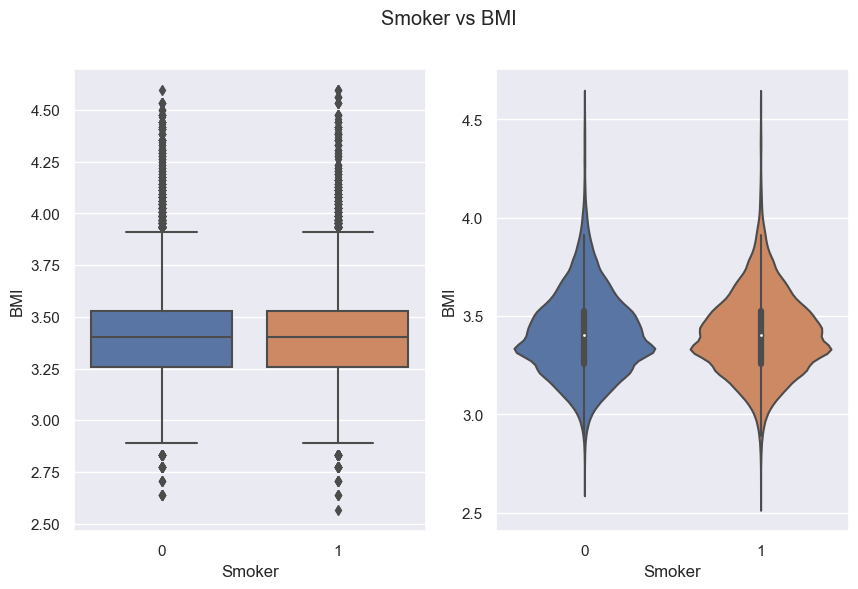

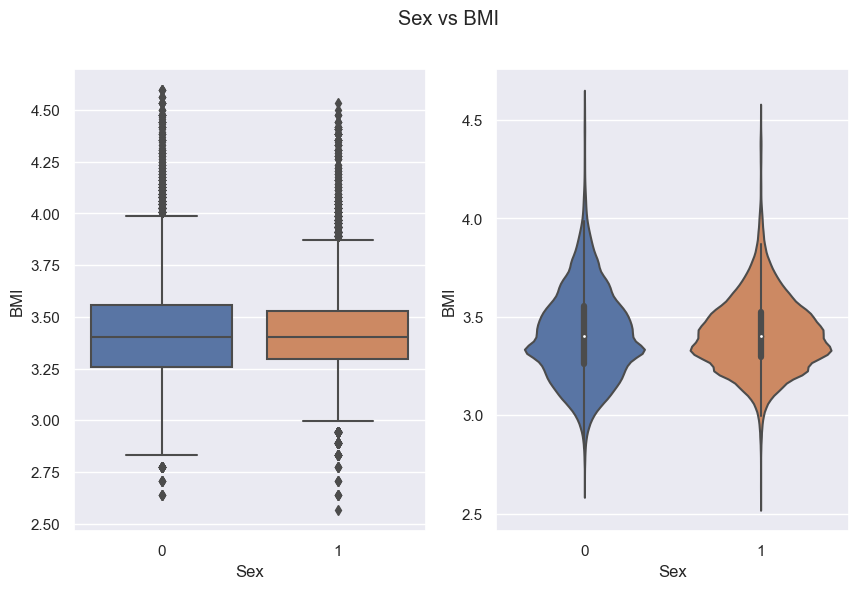

In [27]:
columns_cor_bmi = ['Smoker', 'Sex']

for col in columns_cor_bmi:
    figure,axes=plt.subplots(1,2,figsize=(10,6))
    
    sns.boxplot(data=data, x = col,y='BMI', ax = axes[0])
    plt.suptitle(f'{col} vs BMI')

    sns.violinplot(data=data, x = col,y='BMI', ax=axes[1])
    
    plt.show()

* Smokers have a slightly higer BMI than Non smokers
* Males have a more compact BMI distribution 

# Features Selection

In [28]:
X = data[data.columns[1:]]
y = data[data.columns[0]]

In [29]:
from sklearn.feature_selection import mutual_info_classif as MIC

def make_mi_scores(X, y):
    mi_scores = MIC(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores.sort_values(ascending=False)

GenHlth                 0.090212
HighBP                  0.072928
BMI                     0.054502
Age                     0.049694
HighChol                0.042034
DiffWalk                0.036467
Income                  0.028446
PhysHlth                0.026147
HeartDiseaseorAttack    0.023737
CholCheck               0.018915
PhysActivity            0.016029
Education               0.014820
Stroke                  0.011480
Veggies                 0.007595
HvyAlcoholConsump       0.006717
AnyHealthcare           0.005759
Smoker                  0.005668
Fruits                  0.005219
MentHlth                0.004339
Sex                     0.004293
NoDocbcCost             0.000019
Name: MI Scores, dtype: float64

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)

cols = selector.get_support(indices=True)
X_new = X.iloc[:,cols]

X_new.head()


,HighBP,HighChol,BMI,GenHlth,Age
0,1,0,3.295837,3,4
1,1,1,3.295837,3,12
2,0,0,3.295837,1,13
3,1,1,3.367296,3,11
4,0,0,3.401197,2,8


# Model Selection

In [31]:
# splitting data set
from sklearn.model_selection import train_test_split

X_full_train, X_test, y_full_train, y_test = train_test_split(X_new,y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_full_train,y_full_train, test_size=0.25, random_state=42)

X_train.shape, X_val.shape, X_test.shape

((41433, 5), (13812, 5), (13812, 5))

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# defining models 
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)


score_list = []
for model in [dt, rf, lr]:
    model_name = str(type(model)).split('.')[3][:-2]

    model.fit(X_train,y_train)
    ypred = model.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, ypred)
    score_list.append((model_name,auc))



In [33]:
# xgboost

import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [34]:
d_val = xgb.DMatrix(X_val, enable_categorical=True)

ypred = model_xgb.predict(d_val)
auc = roc_auc_score(y_val, ypred)
auc = round(auc,6)
print(auc)
score_list.append(('Xgboost',auc))

0.816521


In [35]:
#lgbm

import lightgbm as lgb

model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train, y_train)

LGBMClassifier()

In [36]:
ypred = model_lgb.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, ypred)
auc = round(auc,6)

score_list.append(('LGBM',auc))

In [37]:
score_df = pd.DataFrame(score_list,columns=['Model', "AUC"])

score_df.sort_values(by='AUC', ascending=False).reset_index(drop=True)

,Model,AUC
0,Xgboost,0.816521
1,LGBM,0.814469
2,LogisticRegression,0.814062
3,RandomForestClassifier,0.780524
4,DecisionTreeClassifier,0.764990


Best Model - **xgboost** 
    AUC    - **0.816521**

# Training Final Model

In [38]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_full_train, label=y_full_train, enable_categorical=True)

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [39]:
dtest = xgb.DMatrix(X_test, enable_categorical=True)
ypred = model_xgb.predict(dtest)

auc = roc_auc_score(y_test, ypred)
auc = round(auc,6)

auc

0.824654

Final model roc_auc_score = **0.824654**

## Saving Model

In [40]:
import pickle

pickle.dump(model_xgb, open('model.pkl', 'wb'))